
<center><img src="../../../images/decision_tree.png" alt="error" width="1000"/></center>

<center><img src="../../../images/decision_tree_2.png" alt="error" width="1000"/></center>

---

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor , plot_tree
from sklearn.model_selection import GridSearchCV , StratifiedKFold , KFold ,train_test_split

from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix , classification_report , r2_score

## Decision Tree Classifier

In [3]:
df = pd.read_csv('../../../datasets/RidingMowers.csv')
df.head()

Income  Lot_Size    Response
0      34        26  Not Bought
1      34        40  Not Bought
2      34        46  Not Bought
3      34        48  Not Bought
4      34        53  Not Bought

In [4]:
df.describe()

Income    Lot_Size
count  180.000000  180.000000
mean    58.383333   69.361111
std     16.469126   29.641200
min     34.000000   20.000000
25%     44.000000   42.750000
50%     56.000000   69.000000
75%     73.000000   93.750000
max     89.000000  124.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Income    180 non-null    int64 
 1   Lot_Size  180 non-null    int64 
 2   Response  180 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.3+ KB


In [6]:
df.isna().sum()

Income      0
Lot_Size    0
Response    0
dtype: int64

<Axes: xlabel='Response'>

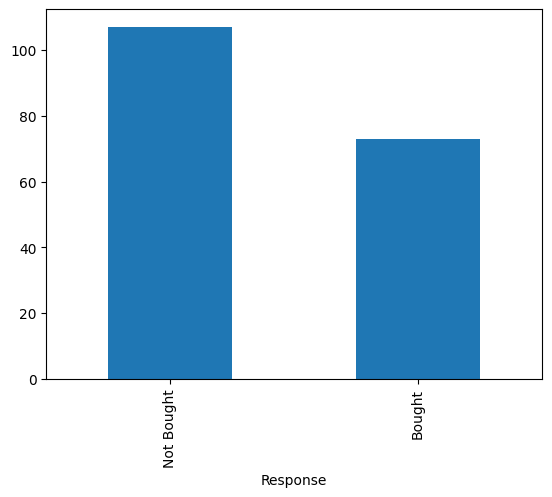

In [7]:
df['Response'].value_counts().plot(kind='bar')

<Axes: xlabel='Income', ylabel='Lot_Size'>

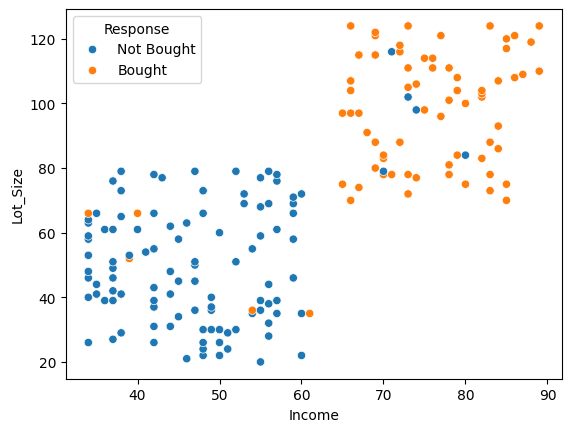

In [8]:
sns.scatterplot(data=df,x='Income',y='Lot_Size',hue='Response')

<Axes: >

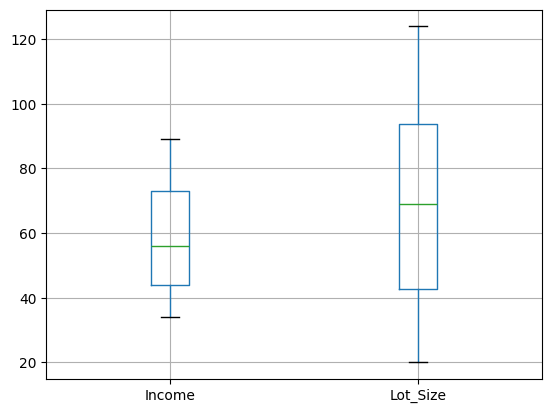

In [9]:
df.boxplot()

In [10]:
df.head()

Income  Lot_Size    Response
0      34        26  Not Bought
1      34        40  Not Bought
2      34        46  Not Bought
3      34        48  Not Bought
4      34        53  Not Bought

In [11]:
dtc = DecisionTreeClassifier()

In [12]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [13]:
x = df.drop(columns='Response')

In [14]:
y = df['Response']  

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=23,stratify=y)

In [16]:
kfold = StratifiedKFold(shuffle=True,n_splits=5,random_state=23)

In [17]:
params = {
    'criterion': ['gini', 'entropy'],  # Measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],  # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

In [18]:
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=1,scoring='neg_log_loss')

In [19]:
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_log_loss', verbose=1)

In [20]:
print("Best Parameters : ",gcv.best_params_)
print("Best Score : ",gcv.best_score_)

Best Parameters :  {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :  -0.2166186656864649


In [21]:
model = gcv.best_estimator_

[Text(0.5, 0.75, 'Income <= 60.5\ngini = 0.482\nsamples = 126\nvalue = [51, 75]\nclass = Bought'),
 Text(0.25, 0.25, 'gini = 0.053\nsamples = 74\nvalue = [2, 72]\nclass = Bought'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.109\nsamples = 52\nvalue = [49, 3]\nclass = Not Bought'),
 Text(0.625, 0.5, '  False')]

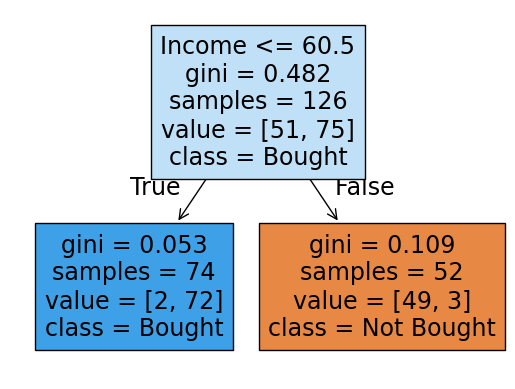

In [22]:
plot_tree(model, feature_names=df.columns, class_names=df['Response'].unique(), filled=True)

In [23]:
y_pred = model.predict(x_test)

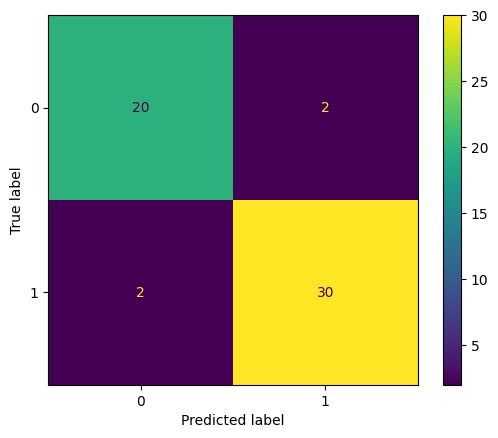

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Bought       0.91      0.91      0.91        22
  Not Bought       0.94      0.94      0.94        32

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54



## Decision Tree Regressor 

In [27]:
data = pd.read_csv('../../../datasets/Boston.csv')
data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

* CRIM: Per capita crime rate by town.
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
* INDUS: Proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
* NOX: Nitric oxide concentration (parts per 10 million).
* RM: Average number of rooms per dwelling.
* AGE: Proportion of owner-occupied units built before 1940.
* DIS: Weighted distances to five Boston employment centers.
* RAD: Index of accessibility to radial highways.
* TAX: Full-value property tax rate per $10,000.
* PTRATIO: Pupil-teacher ratio by town.
* BLACK: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
* LSTAT: Percentage of lower status of the population.
* MEDV: Median value of owner-occupied homes in $1000s.

In [28]:
## We want to predict the MEDV using other Attributes

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [30]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<Axes: >

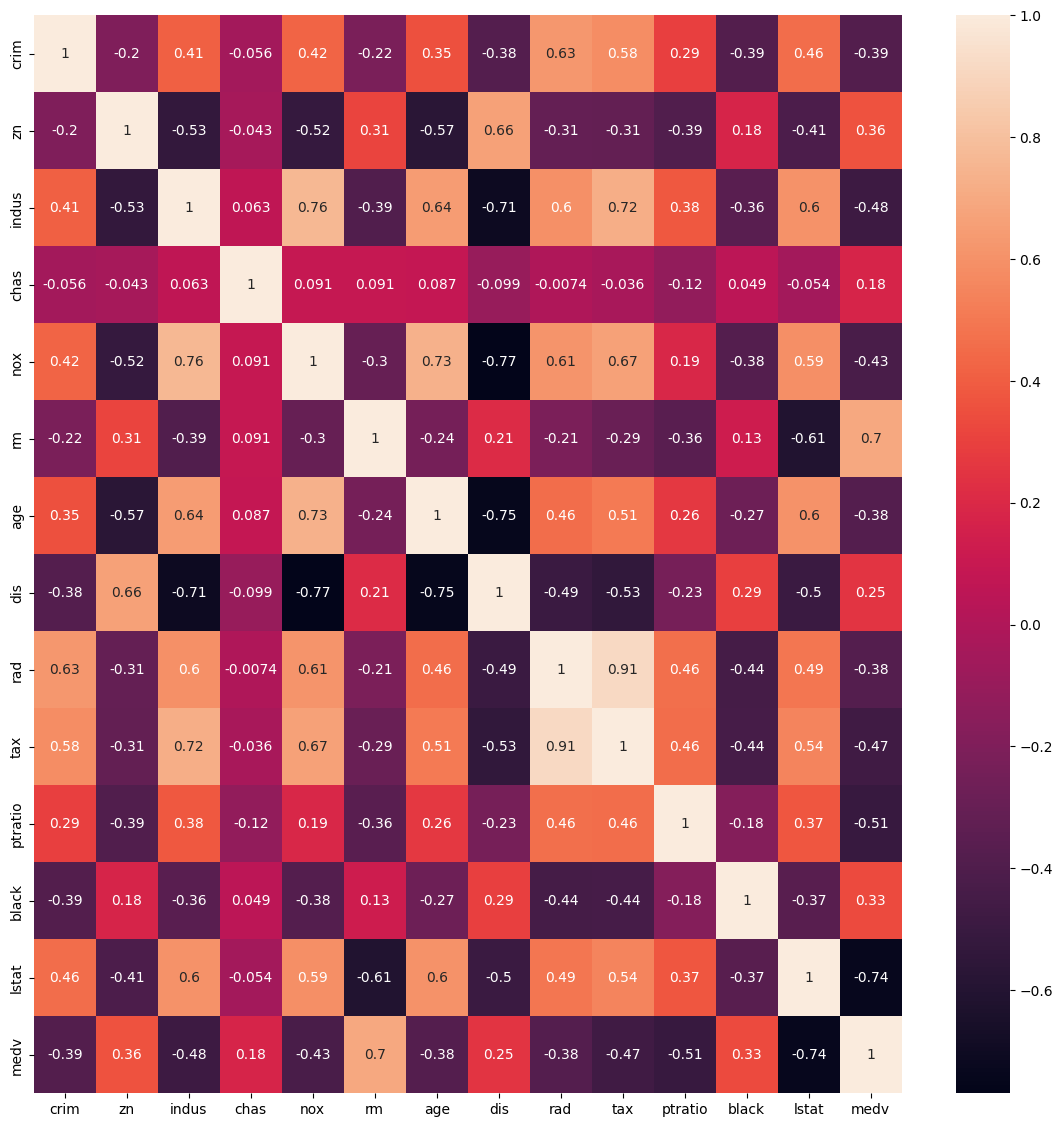

In [31]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True)

<Axes: >

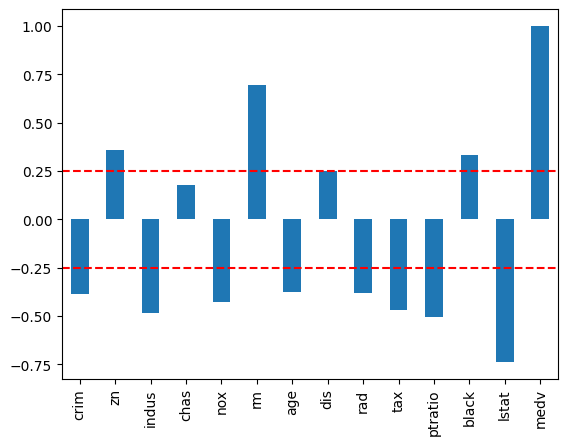

In [32]:
plt.axhline(y=0.25, color='red', linestyle='--')
plt.axhline(y=-0.25, color='red', linestyle='--')
data.corr()['medv'].plot(kind='bar')

In [33]:
x = data.drop(columns=['medv','chas']) # Dropping MDEV as its Y Variable and CHAS as it has very low correlation

In [34]:
y = data['medv']

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=23,shuffle=True)

In [36]:
DTR = DecisionTreeRegressor()

In [37]:
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [38]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],  # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
}

In [39]:
kfold = KFold(n_splits=5,random_state=23,shuffle=True)

In [40]:
gcv = GridSearchCV(DTR,param_grid=params,cv=kfold,verbose=2,scoring='r2')

In [41]:
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5; total

[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=None, ma

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=2)

In [48]:
print(gcv.best_params_)
print(gcv.best_score_)

{'criterion': 'poisson', 'max_depth': 40, 'max_leaf_nodes': 40, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8088531489056112


In [49]:
model_reg = gcv.best_estimator_

In [50]:
y_pred = model_reg.predict(x_test)

In [51]:
r2_score(y_test,y_pred) # Test data Accuracy 

0.7314225753856367

In [52]:
plot_df = pd.DataFrame({"y_test":y_test,"y_pred":y_pred}).reset_index().drop(columns='index')

<Axes: >

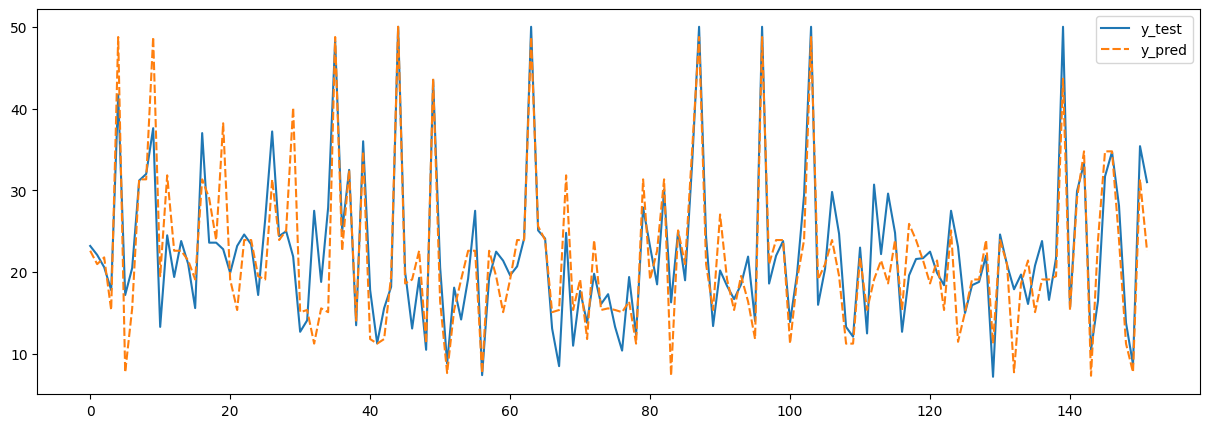

In [53]:
plt.figure(figsize=(15,5))
sns.lineplot(data=plot_df)